# Support Vector Machine on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Loading Dataset

In [112]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

# warnings library is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Importing dataset

df = pd.read_csv('Reviews.csv')

# Displaying first 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Information

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [115]:
print('Number of columns:' + ' ' + str(len(df.columns)))
print('Number of rows:' + ' ' + str(df['Id'].nunique()))
print('Number of reviews:' + ' ' + str(df['Id'].nunique()))
print('Number of products:' + ' ' + str(df['ProductId'].nunique()))
print('Number of users:' + ' ' + str(df['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign Polarity

Let us assign positive (1) to the score 4 and 5

Let us assign negative (0) to the score 1 and 2

Let us ignore score having 3

In [116]:
# Let us first create a new dataset which doesn't have score 3 and it's respective rows.

print('Number of rows before removing score 3:' + ' ' + str(df['Id'].nunique()))

df_score = df[df['Score'] != 3]

print('Number of rows after removing score 3:' + ' ' + str(df_score['Id'].nunique()))

Number of rows before removing score 3: 568454
Number of rows after removing score 3: 525814


In [117]:
# Defining a function to assign polarity.

def scr(sc):
    if sc > 3:
        return 1
    return 0

In [118]:
# Calling function to assign polarity using .apply()
df_score['Score'] = df_score['Score'].apply(scr)

print("Number of positive (1) and negative (0) reviews")

df_score['Score'].value_counts()

Number of positive (1) and negative (0) reviews


1    443777
0     82037
Name: Score, dtype: int64

# Exploratory Data Analysis

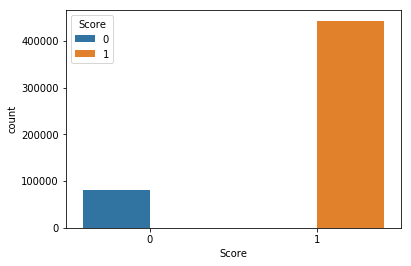

In [119]:
sns.countplot(df_score['Score'], hue = df_score['Score'])

# Observation:

As we can see, number of negative reviews are closer to 10k while positive review is more than 400k.

Ratio of negative and positive review can be assumed to be ~ 1:4.

Also, we can conclude that ~90% of the reviews are positive.

# Data Cleaning:

We have performed few techniques to clean the text and summary data

1) Null values removed

2) Duplicates removed

3) URL links removed

4) HTML tags removed

5) Stopwords removed

6) Stem words obtained

7) Converted from short form word to long form word

We have already performed above data clearning technique and saved.

Importing the clean data.

In [120]:
df_clean = pd.read_csv('Amazon_Final_time.csv')

df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364149 entries, 150523 to 327600
Data columns (total 12 columns):
Id                        364149 non-null int64
ProductId                 364149 non-null object
UserId                    364149 non-null object
ProfileName               364149 non-null object
HelpfulnessNumerator      364149 non-null int64
HelpfulnessDenominator    364149 non-null int64
Score                     364149 non-null int64
Time                      364149 non-null int64
Summary                   364149 non-null object
Text                      364149 non-null object
Clean_Text                364149 non-null object
Clean_Summary             364149 non-null object
dtypes: int64(5), object(7)
memory usage: 36.1+ MB


In [121]:
percentage_red = np.round((df_clean.shape[0]/df.shape[0]),5)*100
print("Data percentage reduced to ", percentage_red)

Data percentage reduced to  64.05999999999999


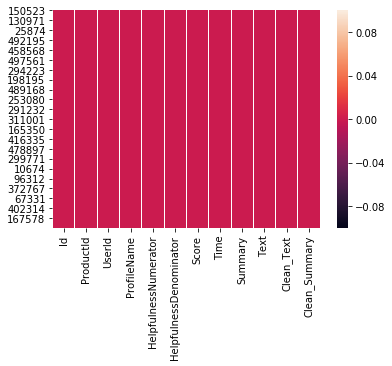

In [122]:
sns.heatmap(df_clean.isnull())

# Observation:
    
There are no null values now. We are good to go to proceed with vectorization

# 100k dataframe

Picking up random 100k samples from the dataset

In [123]:
df_100k = df_clean.sample(n = 100000)

print("Shape of sample dataframe is ", df_100k.shape)
print("Total number of rows: ", df_100k.shape[0])
print("Total number of columns: ", df_100k.shape[1])

Shape of sample dataframe is  (100000, 12)
Total number of rows:  100000
Total number of columns:  12


# Time Series Split

Since the dataset is based on time series, we need to sort based on time in an ascending order

In [124]:
df_sort_100k = df_100k.sort_values('Time', ascending = True)

In [125]:
x_100k = df_sort_100k['Clean_Text']
y_100k = df_sort_100k['Score']

print(x_100k.shape)
print(y_100k.shape)

(100000,)
(100000,)


# 1) Linear Support Vector Machine on BoW, TF-IDF, Avg W2V, TF-IDF W2V

Support Vector Machine is supervised machine learning which is used for both regression and classification dataset. Aim of SVM is to maximize the margin line or boundary as well as it can such that points are well separated.

Linear SVM in particular is used when the data points are linearly separable i.e data points can be well separated by a linear plane in hyperplane.

# Defining a function to find the best hyperparameter(alpha) and penalty (l1/l2)

References:

https://github.com/scikit-learn/scikit-learn/issues/7278

https://www.kaggle.com/mpearmain/calibrated-sgdclassifier

https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html

https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

In [126]:
# Defining a function to find the best hyperparameter(alpha) and penalty (l1/l2)

# Import libraries

import math
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

alpha = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000, 10000]

def sg(tr_x, cv_x, tr_y, cv_y, loss, penalty, alp):    
    
    auc_cv = []
    auc_tr = []
    
    for i in alp:
        
        # SGD Classifier
        sgd = SGDClassifier(loss, penalty, i)
        sgd = sgd.fit(tr_x, tr_y)
        
        # Calibrated Classifier
        cc =  CalibratedClassifierCV(base_estimator = sgd, cv = 'prefit')
        cc = cc.fit(tr_x, tr_y)
        
        # AUC score for CV data
        sgd_pred_cv = cc.predict_proba(cv_x)[:,-1]
        sgd_sc_cv = roc_auc_score(cv_y, sgd_pred_cv)
        auc_cv.append(sgd_sc_cv)
        
        # AUC score for train data
        sgd_pred_tr = cc.predict_proba(tr_x)[:,-1]
        sgd_sc_tr = roc_auc_score(tr_y, sgd_pred_tr)
        auc_tr.append(sgd_sc_tr)
    
    # Optimal alpha for auc score of CV
    sc_cv = [x for x in auc_cv]
    opt_alp_cv = alpha[sc_cv.index(max(sc_cv))]
    print("Maximum AUC score for CV: ", max(sc_cv))
    print("Corresponding alpha value of CV: ", opt_alp_cv, '\n')
    
    # Optimal alpha for auc score of train
    sc_tr = [x for x in auc_tr]
    opt_alp_tr = alpha[sc_tr.index(max(sc_tr))]
    print("Maximum AUC score for train: ", max(sc_tr))
    print("Corresponding alpha value of train: ", opt_alp_tr, '\n')
    
    # Taking logarithmics of hyperparameter (alpha)
    alp_log = []
    for e in alp:
        m = math.log(e)
        alp_log.append(m)
    
    # Plotting Log Alpha v/s AUC score of CV 
    plt.figure(figsize = (10,6))
    
    plt.plot(alp_log, sc_cv, label = 'CV Curve', marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = 10, alpha = 0.5)
    for xy in zip(alp_log, np.round(sc_cv,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy)
    
    # Plotting Log Alpha v/s AUC score of train
    plt.plot(alp_log, sc_tr, label = 'Train Curve', marker = '*', color = 'black', markerfacecolor = 'r', markersize = 10, alpha = 0.5)
    for xy in zip(alp_log, np.round(sc_tr,3)):
        plt.annotate('(%s, %s)' %xy, xy = xy)
        
    plt.legend()
    plt.xlabel("Log Alpha values")
    plt.ylabel("AUC values")
    plt.title("Log Alpha values v/s AUC")
    

# Defining a function to check performance model with ROC AUC curve

In [127]:
# Defining a function to check performance model with ROC AUC curve
# Import libraries

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def mod_per(tr_x, te_x, tr_y, te_y, loss, penalty, alpha):
    
    sgd = SGDClassifier(loss, penalty, alpha)
    sgd = sgd.fit(tr_x, tr_y)
    
    cc = CalibratedClassifierCV(base_estimator = sgd)
    cc = cc.fit(tr_x, tr_y)
    
    pred_p = cc.predict_proba(te_x)[:,-1]
    fpr, tpr, threshold = metrics.roc_curve(te_y, pred_p)
    roc_auc_scr = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color = 'b', label = roc_auc_scr)
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.legend()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC AUC curve")
 

# Defining a function to predict test data and get the metrics

In [128]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix

def test_metric(train_x, test_x, train_y, test_y, loss, penalty, alpha ):
    
    # SGD Classifier
    sgd = SGDClassifier(loss, penalty, alpha)
    sgd = sgd.fit(train_x, train_y)
    
    # Calibrated Classifier
    cc = CalibratedClassifierCV(sgd)
    cc = cc.fit(train_x, train_y)
    
    # Prediction
    pred = cc.predict(test_x)
    
    # predict_proba_ for roc_auc_score
    pred_pro = cc.predict_proba(test_x)[:,-1]
    
    # Getting metrics
    print("Metric scores of test data")
    print('*'*25, '\n')
    
    roc_auc = np.round(roc_auc_score(test_y, pred_pro),3)
    print("ROC AUC score: ", roc_auc, '\n')
    print('*'*25, '\n')
    
    precision = np.round(precision_score(test_y, pred),3)
    print("Precision score: ", precision, '\n')
    print('*'*25, '\n')
    
    f1 = np.round(f1_score(test_y, pred),3)
    print("F1 score: ", f1, '\n')
    print('*'*25, '\n')
    
    recall = np.round(recall_score(test_y, pred),3)
    print("Recall score: ", recall, '\n')
    print('*'*25, '\n')
    
    class_report = classification_report(test_y, pred)
    print("Classification Report:", '\n')
    print(class_report, '\n')
    print('*'*25, '\n')
    
    print("Confusion matrix table:", '\n')
    skplt.metrics.plot_confusion_matrix(test_y, pred)
    
    return roc_auc, precision, f1, recall, sgd

# Split into train and test set

In [129]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_100k, y_100k, random_state = 0, test_size = 0.2, shuffle = False)

In [130]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (80000,)
Shape of x_test:  (20000,)
Shape of y_train:  (80000,)
Shape of y_test:  (20000,)


# Linear SVM on Bag of Words

In [131]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv = CountVectorizer(ngram_range = (1,2))

# Fit and transform train data
x_train_f = cv.fit_transform(x_train)

# Transform test data
x_test_f = cv.transform(x_test)

# Normalization

Normalization is a feature scaling technique which transforms all the data variables to the same scale or in same range i.e 0.0 to 0.1

In [132]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_train_n = normalize(x_train_f)

# Normalize test data
x_test_n = normalize(x_test_f)

# Split into train and cv data

In [133]:
# Split into train and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(x_train_n, y_train, random_state = 0, test_size = 0.25, shuffle = False)

In [134]:
print("Shape of x_train_n: ", x_train_n.shape)
print("Shape of x_cv: ", x_cv.shape)
print("Shape of x_test_n: ", x_test_n.shape)
print("Shape of y_cv: ", y_cv.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train_n:  (80000, 1104509)
Shape of x_cv:  (20000, 1104509)
Shape of x_test_n:  (20000, 1104509)
Shape of y_cv:  (20000,)
Shape of y_train:  (80000,)
Shape of y_test:  (20000,)


# Calling 'sg' function to find the optimal alpha and penalty

*************************
With penalty as l1 norm
************************* 

Maximum AUC score for CV:  0.9288841523079846
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.9230069668382672
Corresponding alpha value of train:  0.0001 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score for CV:  0.9438694595834729
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.95931873767372
Corresponding alpha value of train:  0.0001 



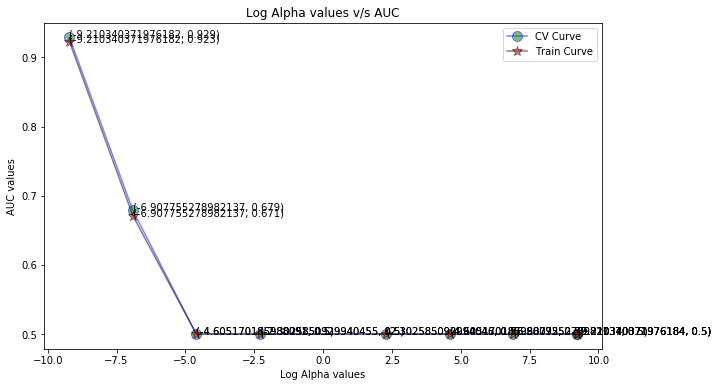

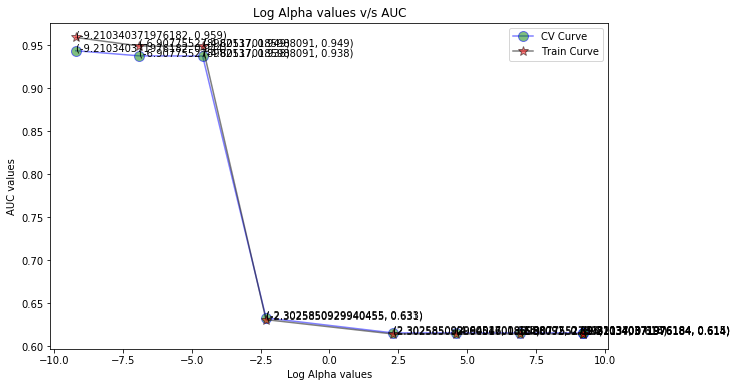

In [135]:
# Calling 'sg' function to find the optimal alpha and penalty

print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
sg(x_tr, x_cv, y_tr, y_cv, 'hinge', 'l1', alpha)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
sg(x_tr, x_cv, y_tr, y_cv, 'hinge', 'l2', alpha)

# Observation:

With norm l1, AUC score for cv is 92% and corresponding alpha is 0.0001 and AUC score of train is ~92% and corresponding alpha is 0.0001

With norm l2, AUC score for cv is 94% and corresponding alpha is 0.0001 and AUC score of train is ~95% and corresponding alpha is 0.0001

Optimal alpha: 0.0001

Optimal norm: l2

In [136]:
o_a_b = 0.0001
o_n_b = 'l2'

# Calling 'mod_per' function to check the performance model for train and CV

Alpha: 0.0001
    
Norm: l2


 Model performance on train and CV data With penalty  l2 norm and alpha 0.0001 



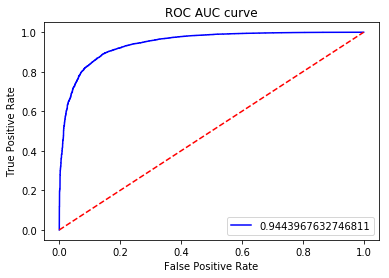

In [137]:
# Calling 'mod_per' function to check the performance model for train and CV
# Alpha: 0.0001
# Norm: l2

print("\n Model performance on train and CV data With penalty ", o_n_b, "norm and alpha", o_a_b, "\n")

mod_per(x_tr, x_cv, y_tr, y_cv, 'hinge', o_n_b, o_a_b)

# Observation:
    
We can see that the model probability to separate positive and negative review is 94%

# Calling 'test_metric' function to predict test data and get metrics

Alpha: 0.0001
    
Norm: l2

Metric scores of test data
************************* 

ROC AUC score:  0.941 

************************* 

Precision score:  0.929 

************************* 

F1 score:  0.949 

************************* 

Recall score:  0.97 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.65      0.72      3470
           1       0.93      0.97      0.95     16530

   micro avg       0.91      0.91      0.91     20000
   macro avg       0.87      0.81      0.84     20000
weighted avg       0.91      0.91      0.91     20000
 

************************* 

Confusion matrix table: 



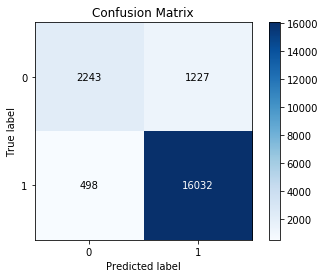

In [138]:
# Calling 'test_metric' function to predict test data and get metrics
# Alpha: 0.0001
# Norm: l2

rab, pb, fb, reb, bow_te = test_metric(x_train_n, x_test_n, y_train, y_test, 'hinge', o_n_b, o_a_b)

# Calling 'mod_per' to check model performance with ROC AUC curve on test data

Alpha: 0.0001
    
Norm: l2


 Model performance on test data With penalty  l2 norm and alpha 0.0001 



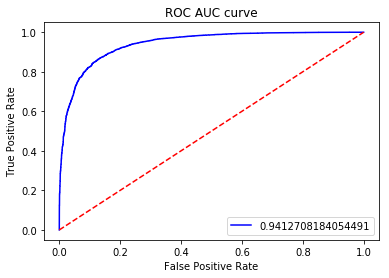

In [139]:
# Calling 'mod_per' to check model performance with ROC AUC curve on test data
# Alpha: 0.0001
# Norm: l2

print("\n Model performance on test data With penalty ", o_n_b, "norm and alpha", o_a_b, "\n")

mod_per(x_train_n, x_test_n, y_train, y_test, 'hinge', o_n_b, o_a_b)

# Observation

Model probabillity of separating positive and negative review is 94%

# Linear SVM on TF-IDF: Term Frequency Inverse Document Frequency

In [140]:
# Import TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance
tf = TfidfVectorizer()

# Fit and transform train data
x_train_tf = tf.fit_transform(x_train)

# Transform test data
x_test_tf = tf.transform(x_test)

# Normalization

In [141]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_train_tf_n = normalize(x_train_tf)

# Normalize test data
x_test_tf_n = normalize(x_test_tf)

# Split into train and CV

In [142]:
# Split into train and CV

x_tr_tf, x_cv_tf, y_tr_tf, y_cv_tf = train_test_split(x_train_tf_n, y_train, random_state = 0, test_size = 0.25, shuffle = False)

# Calling 'sg' function to find optimal alpha and penalty

*************************
With penalty as l1 norm
************************* 

Maximum AUC score for CV:  0.9323178992369026
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.9281952474544979
Corresponding alpha value of train:  0.0001 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score for CV:  0.9442548509505828
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.954271897999064
Corresponding alpha value of train:  0.0001 



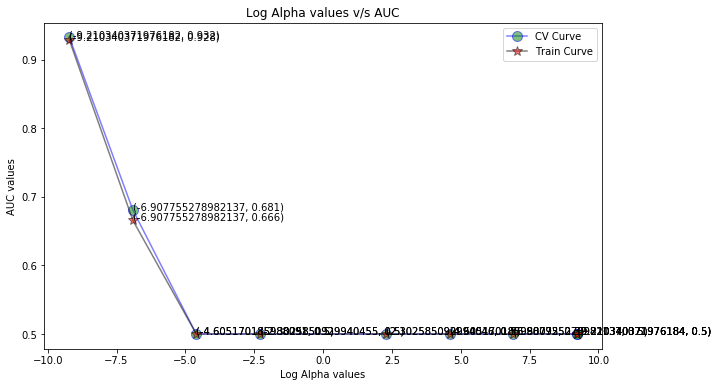

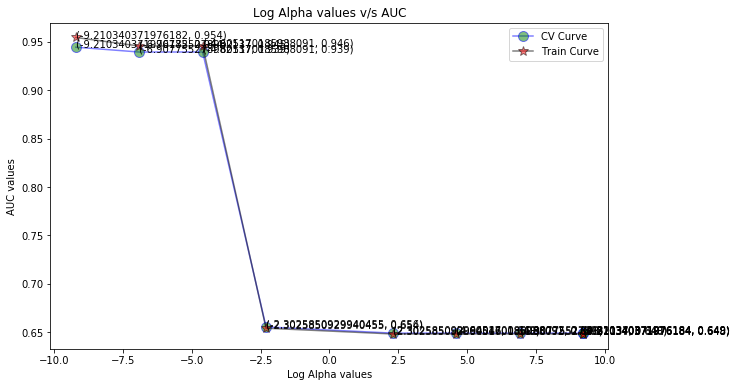

In [143]:
# Calling 'sg' function to find the optimal alpha and penalty

print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
sg(x_tr_tf, x_cv_tf, y_tr_tf, y_cv_tf, 'hinge', 'l1', alpha)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
sg(x_tr_tf, x_cv_tf, y_tr_tf, y_cv_tf, 'hinge', 'l2', alpha)

# Observation:
    
With l1 norm AUC score for CV is 93% and corresponding alpha is 0.0001 and AUC score for train is 92% and corresponding alpha value is 0.0001
   
With l2 norm AUC score for CV is 94% and corresponding alpha is 0.0001 and AUC score for train is 95% and corresponding alpha value is 0.0001

Optimal alpha: 0.0001

Optimal norm: l2

In [144]:
o_a_tf = 0.0001
o_n_tf = 'l2'

# Calling 'mod_per' function to check the model performance with ROC AUC score on CV data

Optimal alpha: 0.0001

Optimal norm: l2


 Model performance on CV data With penalty l2 norm and alpha 0.0001 



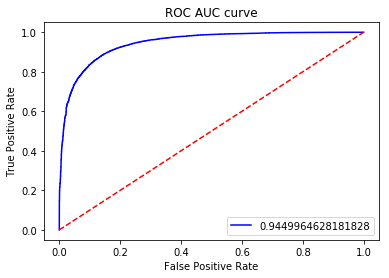

In [145]:
# Calling 'mod_per' function to check the model performance with ROC AUC score on CV data
# Optimal alpha: 0.0001
# Optimal norm: l2

print("\n Model performance on CV data With penalty", o_n_tf, "norm and alpha", o_a_tf, "\n")

mod_per(x_tr_tf, x_cv_tf, y_tr_tf, y_cv_tf, 'hinge', o_n_tf, o_a_tf)

# Observation:

Probability of model to separate positive and negative review is 94%

# Calling 'test_metric' function to predict test data and get the metrics

Alpha: 0.0001
    
Norm: l2

Metric scores of test data
************************* 

ROC AUC score:  0.942 

************************* 

Precision score:  0.925 

************************* 

F1 score:  0.948 

************************* 

Recall score:  0.973 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.63      0.71      3470
           1       0.93      0.97      0.95     16530

   micro avg       0.91      0.91      0.91     20000
   macro avg       0.88      0.80      0.83     20000
weighted avg       0.91      0.91      0.91     20000
 

************************* 

Confusion matrix table: 



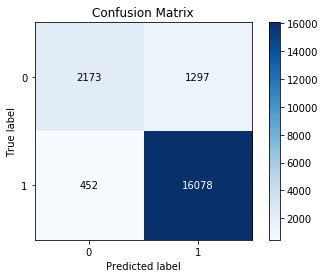

In [146]:
# Calling 'test_metric' function to predict test data and get the metrics
# Alpha: 0.0001 
# Norm: l2

ratf, ptf, ftf, retf, tf_te = test_metric(x_train_tf_n, x_test_tf_n, y_train, y_test, 'hinge', o_n_tf, o_a_tf)

# Calling 'mod_per' function to check model performance on test data

Alpha: 0.0001

Norm: l2


 Model performance on test data With penalty l2 norm and alpha 0.0001 



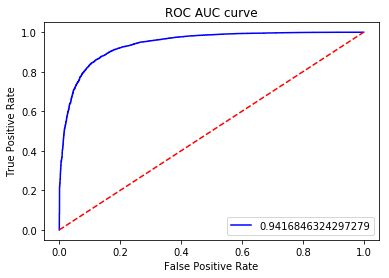

In [147]:
# Calling 'mod_per' function to check model performance on test data
# Alpha: 0.0001
# Norm: l2

print("\n Model performance on test data With penalty", o_n_tf, "norm and alpha", o_a_tf, "\n")

mod_per(x_train_tf_n, x_test_tf_n, y_train, y_test, 'hinge', o_n_tf, o_a_tf)

# Observation

Probability of model to separate positive and negative review is 94%

# Word2Vec

# Splitting train and test set into train and cv

In [150]:
# Splitting train and test set into train and cv

x_tr_w, x_cv_w, y_tr_w, y_cv_w = train_test_split(x_train, y_train, random_state = 0,
                                                          test_size = 0.25, shuffle = False)

In [151]:
print("Shape of x train:", x_tr_w.shape[0])
print("Shape of x cv:", x_cv_w.shape[0])
print("Shape of x test:", x_test.shape[0])
print("Shape of y train:", y_tr_w.shape[0])
print("Shape of y cv:", y_cv_w.shape[0])
print("Shape of y test:", y_test.shape[0])

Shape of x train: 60000
Shape of x cv: 20000
Shape of x test: 20000
Shape of y train: 60000
Shape of y cv: 20000
Shape of y test: 20000


# Defining a function to create Word2Vec

In [152]:
# Defining a function to create Word2Vec

def w(x_t):
    
    list_t = []
    
    for text in x_t:
        split = text.split()
        list_t.append(split)
    return list_t

# Calling function 'w' to get list of words of x_train, x_test and x_cv

In [153]:
# Calling function 'w' to get list of words of x_train, x_test and x_cv

x_tr_list = w(x_tr_w)
x_test_list = w(x_test)
x_cv_list = w(x_cv_w)

In [154]:
# Creating Word2Vec model using train data (x_train_list)

# import gensim library
import gensim

#Create an instance for the genism model
w2v_model = gensim.models.Word2Vec(x_tr_list, min_count = 5, size = 50, workers = 4)
print(w2v_model)

# Creating own corpus vocabulary
w2v_vocab = w2v_model[w2v_model.wv.vocab]
print("Shape of w2v_vocab:" + ' ' + str(w2v_vocab.shape))

# Creating list of words
w2v_word = list(w2v_model.wv.vocab)
print("Length of w2v_word:" + ' ' + str(len(w2v_word)), '\n')
print('*'*50)
print("First 10 words from the list of words w2v_word:")
w2v_word[:10]

Word2Vec(vocab=10512, size=50, alpha=0.025)
Shape of w2v_vocab: (10512, 50)
Length of w2v_word: 10512 

**************************************************
First 10 words from the list of words w2v_word:


['rememb',
 'see',
 'show',
 'air',
 'televis',
 'year',
 'ago',
 'child',
 'sister',
 'later']

In [155]:
# Let's check the most similar words

w2v_model.wv.most_similar('happi')

[('thrill', 0.7669071555137634),
 ('glad', 0.7074651122093201),
 ('excit', 0.7040402293205261),
 ('pleas', 0.6709413528442383),
 ('thank', 0.559987485408783),
 ('abl', 0.5586487650871277),
 ('difficult', 0.5417687296867371),
 ('unabl', 0.5325940251350403),
 ('com', 0.5312549471855164),
 ('delight', 0.5298416018486023)]

# Observation:
As we can see, .most_similar gives the similar words to the input word along with the percentage of similarity

# Defining a function for Avg Word2Vec

In [156]:
# Defining a function for Avg Word2Vec

def sent(word_list):

    sentence = [] # avg w2v of sentence/review will be stored in the empty list

    for sen in word_list:
        zero = np.zeros(50)  # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        count_div = 0         # Increases by 1 every iteration and divides the w2v the sum of w2v sentence/review
        for word in sen:
            if word in w2v_word:
                vec = w2v_model.wv[word]  # Gets the w2v for each word in a sentence/review
                zero += vec              # Sums the w2v of each word in a sentence/review at every iteration
                count_div += 1           # Increases by 1 at every iteration
        if count_div != 0:
            zero /= count_div            # w2v of sentence/review is divided by total number of words in a sentence/review (average w2v)
        sentence.append(zero)            # Stores all the avg w2z in an empty list sentence
    
    return sentence

# Average Word2Vec- Calling 'sent' function to get Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [157]:
# Calling 'sent' function to get Avg Word2Vec

# Avg Word2Vec for train
x_tr_avg_w2v = sent(x_tr_list)

# Avg Word2Vec for cv
x_cv_avg_w2v = sent(x_cv_list)

# Avg Word2Vec for test
x_test_avg_w2v = sent(x_test_list)

# Normalization

In [158]:
# Normalize train data
x_tr_avg_n = normalize(x_tr_avg_w2v)
print("Shape of normalized train Avg Word2Vec:" + ' ' + str(len(x_tr_avg_n)))

# Normalize cv data
x_cv_avg_n = normalize(x_cv_avg_w2v)
print("Shape of normalized cv Avg Word2Vec:" + ' ' + str(len(x_cv_avg_n)))

# Normalize test data
x_test_avg_n = normalize(x_test_avg_w2v)
print("Shape of normalized Avg Word2Vec:" + ' ' + str(len(x_test_avg_n)))

Shape of normalized train Avg Word2Vec: 60000
Shape of normalized cv Avg Word2Vec: 20000
Shape of normalized Avg Word2Vec: 20000


# Calling 'sg' function to find optimal alpha and penalty

*************************
With penalty as l1 norm
************************* 

Maximum AUC score for CV:  0.89954847543316
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.8936920525598172
Corresponding alpha value of train:  0.0001 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score for CV:  0.8996723916292022
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.8931083429784359
Corresponding alpha value of train:  10 



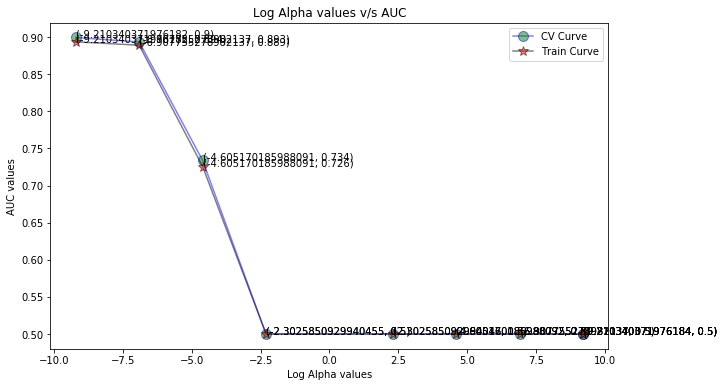

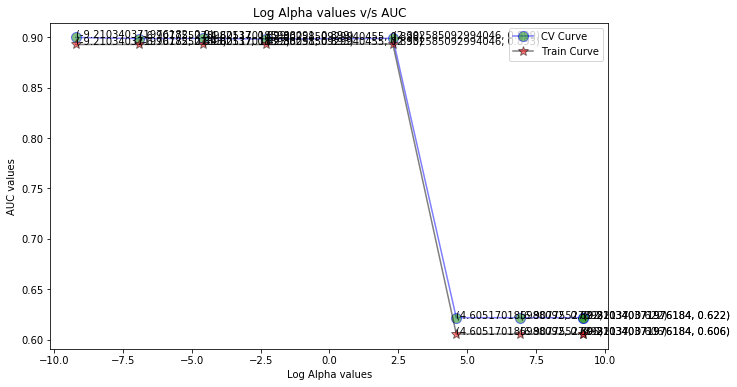

In [159]:
# Calling 'sg' function to find optimal alpha and penalty

print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
sg(x_tr_avg_n, x_cv_avg_n, y_tr_w, y_cv_w, 'hinge', 'l1', alpha)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
sg(x_tr_avg_n, x_cv_avg_n, y_tr_w, y_cv_w, 'hinge', 'l2', alpha)

# Observation:

With l1 norm AUC score for both CV and train is 89% with alpha 0.0001
With l2 norm AUC score for both CV and train is 89% with alpha 0.0001 and 10 respectively. 

Optimal alpha: 0.0001

Optimal norm: l1 or l2

In [160]:
o_a_avg = 0.0001
o_n_avg = 'l1'

# Calling 'mod_per' functio to check model performance with ROC curve on CV

Alpha: 0.0001

Norm: l1


 Model performance on CV data with penalty l1 norm and alpha 0.0001 



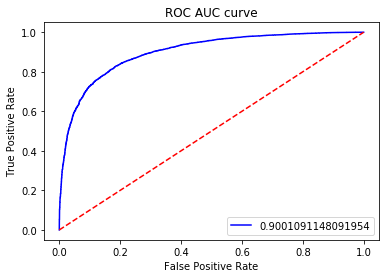

In [161]:
# Calling 'mod_per' functio to check model performance with ROC curve on CV
# Alpha: 0.0001
# Norm: l1

print("\n Model performance on CV data with penalty", o_n_avg, "norm and alpha", o_a_avg, "\n")

mod_per(x_tr_avg_n, x_cv_avg_n, y_tr_w, y_cv_w, 'hinge', o_n_avg, o_a_avg)

# Observation:
    
Probability of model to separate positive and negative review is 90%

# Calling 'test_metric' function to predict test data and get metrics

Alpha: 0.0001
    
Norm: l1

Metric scores of test data
************************* 

ROC AUC score:  0.895 

************************* 

Precision score:  0.894 

************************* 

F1 score:  0.928 

************************* 

Recall score:  0.964 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.73      0.45      0.56      3470
           1       0.89      0.96      0.93     16530

   micro avg       0.88      0.88      0.88     20000
   macro avg       0.81      0.71      0.74     20000
weighted avg       0.86      0.88      0.86     20000
 

************************* 

Confusion matrix table: 



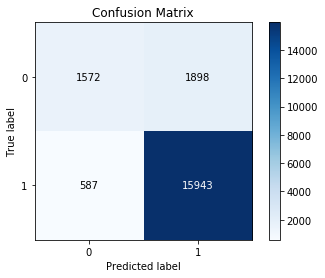

In [162]:
# Calling 'test_metric' function to predict test data and get metrics
# Alpha: 0.0001
# Norm: l1

ra_avg, p_avg, f_avg, re_avg, ea = test_metric(x_tr_avg_n, x_test_avg_n, y_tr_w, y_test, 'hinge', o_n_avg, o_a_avg)

# Calling 'mod_per' function to check model performance on test data and get metrics

Alpha: 0.00001
    
Norm: l1


 Model performance on test data with penalty l1 norm and alpha 0.0001 



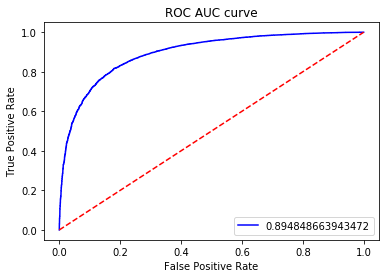

In [163]:
# Calling 'mod_per' function to check model performance on test data and get metrics
# Alpha: 0.00001
# Norm: l1

print("\n Model performance on test data with penalty", o_n_avg, "norm and alpha", o_a_avg, "\n")

mod_per(x_tr_avg_n, x_test_avg_n, y_tr_w, y_test, 'hinge', o_n_avg, o_a_avg)

# Observation:

Probability of model to separate positive and negative review is 89%

# TF-IDF Word2Vec

# Defining a function to get TF-IDF Word2Vec

In [165]:
# Defining a function to get TF-IDF Word2Vec

def tf_w(word_list):
    tf_sentence = []   # Empty list to store the tfidf-w2v values
    for tf_sent in word_list:
        tf_zero = np.zeros(50)     # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        tf_count = 0                # Increases by tfidf value of previous tfidf value for every iteration and divides the sum of tfidf-w2v of sentence/review
        for tf_word in tf_sent:
            if tf_word in w2v_word:
                tf_vec = w2v_model.wv[tf_word]  # Get tfidf_w2v for each word in a sentence/review       
                if tf_word in dicti:
                    # tf_w2v = tf_idf_matrix[row, tf_feat.index(tf_word)]
                    tf_w2v = dicti[tf_word] * (tf_sent.count(tf_word))/len(tf_sent) 
                    tf_zero += (tf_vec * tf_w2v)    # Increase by tfidf-w2v value for every iteration
                    tf_count += tf_w2v              # Increase by ifidf value for every iteration
        if tf_count != 0:
            tf_zero /= tf_count                     # tfidf-w2v of sentence/review is divided by total number of tfidf of words in a sentence/review (tfidf-w2v)
        tf_sentence.append(tf_zero)                # Stores all the avg w2z in an empty list sentence
    
    return tf_sentence

# Calling 'tf_w' function to get TF-IDF Word2Vec

In [166]:
# Calling 'tf_w' function to get TF-IDF Word2Vec

# Avg Word2Vec for train
x_tr_tf_w2v = tf_w(x_tr_list)

# Avg Word2Vec for cv
x_cv_tf_w2v = tf_w(x_cv_list)

# Avg Word2Vec for test
x_test_tf_w2v = tf_w(x_test_list)

# Normalization

In [167]:
# Normalize train data
x_tr_tf_n = normalize(x_tr_tf_w2v)
print("Shape of normalized train TFIDF Word2Vec:" + ' ' + str(len(x_tr_tf_n)))

# Normalize cv data
x_cv_tf_n = normalize(x_cv_tf_w2v)
print("Shape of normalized cv TFIDF Word2Vec:" + ' ' + str(len(x_cv_tf_n)))

# Normalize test data
x_test_tf_n = normalize(x_test_tf_w2v)
print("Shape of normalized TFIDF Word2Vec:" + ' ' + str(len(x_test_tf_n)))

Shape of normalized train TFIDF Word2Vec: 60000
Shape of normalized cv TFIDF Word2Vec: 20000
Shape of normalized TFIDF Word2Vec: 20000


# Calling 'sg' function to find optimal alpha and penalty

*************************
With penalty as l1 norm
************************* 

Maximum AUC score for CV:  0.8706837486599741
Corresponding alpha value of CV:  0.0001 

Maximum AUC score for train:  0.8654302807018467
Corresponding alpha value of train:  0.0001 

*************************
With penalty as l2 norm
************************* 

Maximum AUC score for CV:  0.8700960636743459
Corresponding alpha value of CV:  0.1 

Maximum AUC score for train:  0.8652422116367302
Corresponding alpha value of train:  0.1 



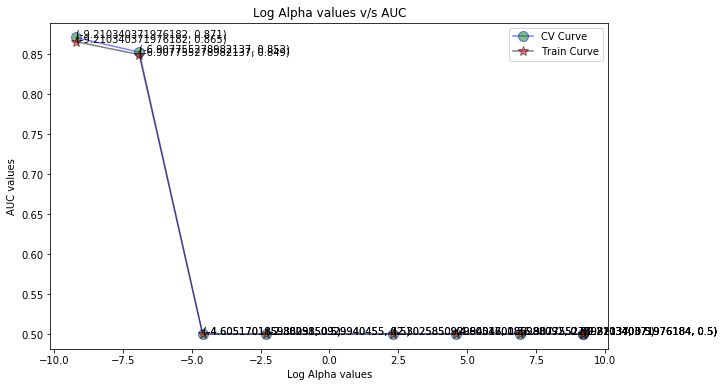

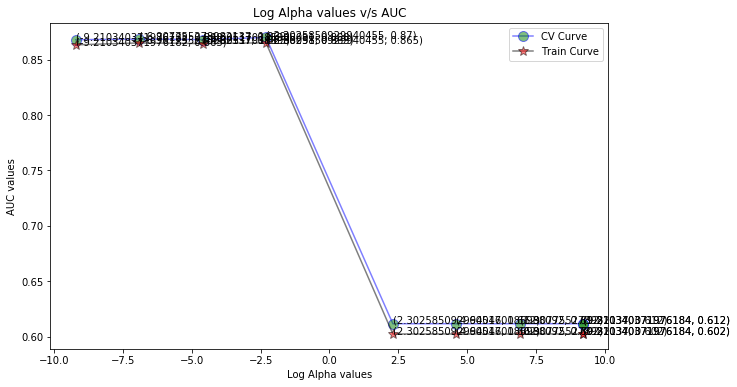

In [168]:
# Calling 'sg' function to find optimal alpha and penalty

print('*'*25)
print("With penalty as l1 norm")
print('*'*25, '\n')
sg(x_tr_tf_n, x_cv_tf_n, y_tr_w, y_cv_w, 'hinge', 'l1', alpha)

print('*'*25)
print("With penalty as l2 norm")
print('*'*25, '\n')
sg(x_tr_tf_n, x_cv_tf_n, y_tr_w, y_cv_w, 'hinge', 'l2', alpha)

# Observation:

With l1 norm, AUC score for CV is 87% and tain is 86% with alpha 0.0001
With l2 norm, AUC score for CV is 87% and tain is 86% with alpha 0.1

Optimal alpha: 0.0001

Optimal norm: l1

In [169]:
o_a_tw = 0.0001
o_n_tw = 'l1'

# Calling 'mod_per' function to check model performance with ROC curve on train and CV

Alpha: 0.0001

Norm: l1


 Model performance on train and cv with l1 norm and alpha 0.0001 



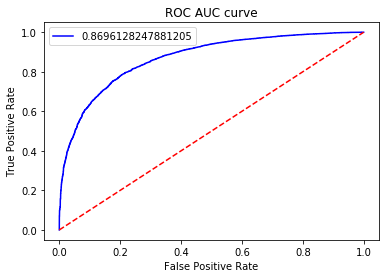

In [170]:
# Calling 'mod_per' function to check model performance with ROC curve on train and CV
# Alpha: 0.0001
# Norm: l1

print("\n Model performance on train and cv with", o_n_tw, "norm and alpha", o_a_tw, "\n")

mod_per(x_tr_tf_n, x_cv_tf_n, y_tr_w, y_cv_w, 'hinge', o_n_tw, o_a_tw)

# Observation:
    
Probability of model to separate positive and negative review is 86%

# Calling 'test_metric' to predict test data and get metrics

Alpha: 0.0001
    
Norm: l1

Metric scores of test data
************************* 

ROC AUC score:  0.865 

************************* 

Precision score:  0.877 

************************* 

F1 score:  0.92 

************************* 

Recall score:  0.968 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.70      0.35      0.47      3470
           1       0.88      0.97      0.92     16530

   micro avg       0.86      0.86      0.86     20000
   macro avg       0.79      0.66      0.69     20000
weighted avg       0.85      0.86      0.84     20000
 

************************* 

Confusion matrix table: 



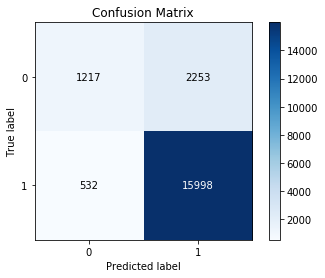

In [171]:
# Calling 'test_metric' to predict test data and get metrics
# Alpha: 0.0001
# Norm: l1

ra_tw, p_tw, f_tw, re_tw, tq = test_metric(x_tr_tf_n, x_test_tf_n, y_tr_w, y_test, 'hinge', o_n_tw, o_a_tw)

# Calling 'mod_per' function to check model performance on test data

Alpha: 0.0001

Norm: l1


 Model performance on train and cv with l1 norm and alpha 0.0001 



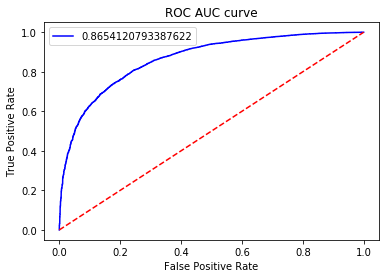

In [172]:
# Calling 'mod_per' function to check model performance on test data
# Alpha: 0.0001
# Norm: l1

print("\n Model performance on train and cv with", o_n_tw, "norm and alpha", o_a_tw, "\n")

mod_per(x_tr_tf_n, x_test_tf_n, y_tr_w, y_test, 'hinge', o_n_tw, o_a_tw)

# Observation:
     
Probability of model to separate positive and negative review is 86%.

# Defining a function to get top 10 positive and negative features  

In [173]:
def top_features(vectorizer, s, n):
    
    feat = vectorizer.get_feature_names()             # Gets all the feature names from vecotrizer (BOW, TF-IDF)
    coef = s.coef_[0]                                 # Gets co-efficients of feature names (BOW, TF-IDF)
    fe_co = sorted(zip(coef, feat))                   # Sorts and zips feature names and co-efficients correspondingly
    top_feat = zip(fe_co[:(n+1):-1], fe_co[:n])       # Zips all n number of feature names and co-efficients correspondingly
    
    print("\t  Positive \t\t\t\t\t   Negative \t\t")
    print('-'*100)
    for (fea_1, coe_1), (fea_2, coe_2) in top_feat:              # loop to print n number of features 
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (fea_1, coe_1, fea_2, coe_2))
          

# Top 10 positive and negative features of BoW

Calling top_features function

In [174]:
# Calling top_features function

print(" \n Top 10 positive and negative features of BoW", '\n')

top_features(cv, bow_te, 10)

 
 Top 10 positive and negative features of BoW 

	  Positive 					   Negative 		
----------------------------------------------------------------------------------------------------
	2.6312	best           				-4.7250	disappoint     
	2.5217	great          				-3.9865	return         
	2.4900	delici         				-3.4586	worst          
	2.4472	perfect        				-3.3660	aw             
	2.3001	excel          				-3.1768	horribl        
	1.9166	amaz           				-3.0559	terribl        
	1.9100	love           				-2.6784	stale          
	1.8372	nice           				-2.6574	threw          
	1.6928	awesom         				-2.6051	wast           
	1.6790	happi          				-2.4717	unfortun       


# Top 10 positive and negative features of TF-IDF

Calling top_features function

In [175]:
# Calling top_features function

print("\n Top 10 positive and negative features of TF-IDF", '\n')

top_features(tf, tf_te, 10)


 Top 10 positive and negative features of TF-IDF 

	  Positive 					   Negative 		
----------------------------------------------------------------------------------------------------
	3.8044	great          				-4.1183	disappoint     
	3.0632	best           				-3.6453	worst          
	2.8499	love           				-3.5838	return         
	2.6076	delici         				-3.3702	aw             
	2.4336	good           				-2.8351	terribl        
	2.3985	perfect        				-2.7700	threw          
	2.1793	excel          				-2.7489	horribl        
	1.9502	nice           				-2.6095	wast           
	1.8567	amaz           				-2.5706	refund         
	1.6654	wonder         				-2.5163	stale          


# RBF Kernel: Radial Basis Function Kernel

RBF Kernel is a kernel function used in various kernelized learning algorithm.

Kernel generally briefed as technique or a trick which transforms a given space into some other space (higher dimension). Kernelization comes into play it is quite difficult or rather it would be correct to impossible to separate positive and negative points. Kernelization transforms these points to higher dimension space where it becomes possible to separate positive and negative points.

# Working with 20k points

In [176]:
df_20k = df_clean.sample(n = 20000)

print("Shape of sample dataframe is ", df_20k.shape)
print("Total number of rows: ", df_20k.shape[0])
print("Total number of columns: ", df_20k.shape[1])

Shape of sample dataframe is  (20000, 12)
Total number of rows:  20000
Total number of columns:  12


# Time Series Split

Since the dataset is based on time series, we need to sort based on time in an ascending order

In [177]:
df_sort_20k = df_20k.sort_values('Time', ascending = True)

In [178]:
x_20k = df_sort_20k['Clean_Text']
y_20k = df_sort_20k['Score']

print(x_20k.shape)
print(y_20k.shape)

(20000,)
(20000,)


# RBF Kernel on Bow, TF-IDF, Avg Word2Vec and TF-IDF Word2Vec

RBF Kernel comes into play when the data points are not linearly separable. Kernelization function generally means data points are taken into other dimension (higher dimension) which makes it possible to separate data points.

# Defining function to find the optimal C

In [277]:
# Defining a function to find the optimal C.

# Import libraries

import math
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

c = [ 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000, 10000]

def sv(tr_x, cv_x, tr_y, cv_y, C, kernel):    
    
    auc_sv_cv = []
    auc_sv_tr = []
    
    for i in C:
        
        # SVC
        sv = SVC(i, kernel, probability = True)
        sv = sv.fit(tr_x, tr_y)
        
        # AUC score for CV data
        sv_pred_cv = sv.predict_proba(cv_x)[:,-1]
        sv_sc_cv = roc_auc_score(cv_y, sv_pred_cv)
        auc_sv_cv.append(sv_sc_cv)
        
        # AUC score for train data
        sv_pred_tr = sv.predict_proba(tr_x)[:,-1]
        sv_sc_tr = roc_auc_score(tr_y, sv_pred_tr)
        auc_sv_tr.append(sv_sc_tr)
    
    # Optimal C for auc score of CV
    sc_sv_cv = [x for x in auc_sv_cv]
    opt_c_sv_cv = c[sc_sv_cv.index(max(sc_sv_cv))]
    print("Maximum AUC score for CV: ", max(sc_sv_cv))
    print("Corresponding C value of CV: ", opt_c_sv_cv, '\n')
    
    # Optimal C for auc score of train
    sc_sv_tr = [x for x in auc_sv_tr]
    opt_c_sv_tr = c[sc_sv_tr.index(max(sc_sv_tr))]
    print("Maximum AUC score for train: ", max(sc_sv_tr))
    print("Corresponding C value of train: ", opt_c_sv_tr, '\n')
    
    # Taking logarithmics of hyperparameter (alpha)
    C_log = []
    for e in C:
        m = math.log(e)
        C_log.append(m)
    
    # Plotting C v/s AUC score of CV 
    plt.figure(figsize = (10,6))
    
    plt.plot(C_log, sc_sv_cv, label = 'CV Curve', marker = 'o', color = 'blue', markerfacecolor = 'g', markersize = 10, alpha = 0.5)
    for xy in zip(C_log, np.round(sc_sv_cv,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy)
    
    # Plotting C v/s AUC score of train
    plt.plot(C_log, sc_sv_tr, label = 'Train Curve', marker = '*', color = 'black', markerfacecolor = 'r', markersize = 10, alpha = 0.5)
    for xy in zip(C_log, np.round(sc_sv_tr,3)):
        plt.annotate('(%s, %s)' %xy, xy = xy)
        
    plt.legend()
    plt.xlabel("Log C values")
    plt.ylabel("AUC values")
    plt.title("Log C values v/s AUC")
    

# Defining a function to check model performance with ROC AUC curve

In [180]:
# Defining a function to check performance model with ROC AUC curve
# Import libraries

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def mod_per_sv(tr_x, te_x, tr_y, te_y, C, kernel):
    
    sv = SVC(C, kernel, probability = True)
    sv = sv.fit(tr_x, tr_y)
    
    pred_sv_p = sv.predict_proba(te_x)[:,-1]
    fpr, tpr, threshold = metrics.roc_curve(te_y, pred_sv_p)
    roc_auc_scr_sv = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color = 'b', label = roc_auc_scr_sv)
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.legend()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC AUC curve")
 

# Defining a function to predict test data and get metrics

In [181]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix

def test_metric_sv(train_x, test_x, train_y, test_y, C, kernel):
    
    # SGD Classifier
    sv = SVC(C, kernel, probability = True)
    sv = sv.fit(train_x, train_y)
   
    # Prediction
    pred = sv.predict(test_x)
    
    # predict_proba_ for roc_auc_score
    pred_pro = sv.predict_proba(test_x)[:,-1]
    
    # Getting metrics
    print("Metric scores of test data")
    print('*'*25, '\n')
    
    roc_auc = np.round(roc_auc_score(test_y, pred_pro),3)
    print("ROC AUC score: ", roc_auc, '\n')
    print('*'*25, '\n')
    
    precision = np.round(precision_score(test_y, pred),3)
    print("Precision score: ", precision, '\n')
    print('*'*25, '\n')
    
    f1 = np.round(f1_score(test_y, pred),3)
    print("F1 score: ", f1, '\n')
    print('*'*25, '\n')
    
    recall = np.round(recall_score(test_y, pred),3)
    print("Recall score: ", recall, '\n')
    print('*'*25, '\n')
    
    class_report = classification_report(test_y, pred)
    print("Classification Report:", '\n')
    print(class_report, '\n')
    print('*'*25, '\n')
    
    print("Confusion matrix table:", '\n')
    skplt.metrics.plot_confusion_matrix(test_y, pred)
    
    return roc_auc, precision, f1, recall

# Split into train and test set

In [182]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split into train and test set
x_train_sv, x_test_sv, y_train_sv, y_test_sv = train_test_split(x_20k, y_20k, random_state = 0, test_size = 0.2, shuffle = False)

# RBF Kernel on BoW (Bag of Word)

In [183]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv_sv = CountVectorizer(ngram_range = (1,2), min_df = 10, max_features = 500)

# Fit and transform train data
x_train_sv_f = cv_sv.fit_transform(x_train_sv)

# Transform test data
x_test_sv_f = cv_sv.transform(x_test_sv)

# Normalization

In [184]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_train_sv_n = normalize(x_train_sv_f)

# Normalize test data
x_test_sv_n = normalize(x_test_sv_f)

# Split into train and CV set

In [185]:
# Split into train and CV set

x_tr_sv, x_cv_sv, y_tr_sv, y_cv_sv = train_test_split(x_train_sv_n, y_train_sv, random_state = 0, test_size  = 0.2, shuffle = False)

# Calling 'sv' function to find the optimal C

Maximum AUC score for CV:  0.8974019154551087
Corresponding C value of CV:  100 

Maximum AUC score for train:  0.927547706918763
Corresponding C value of train:  10000 



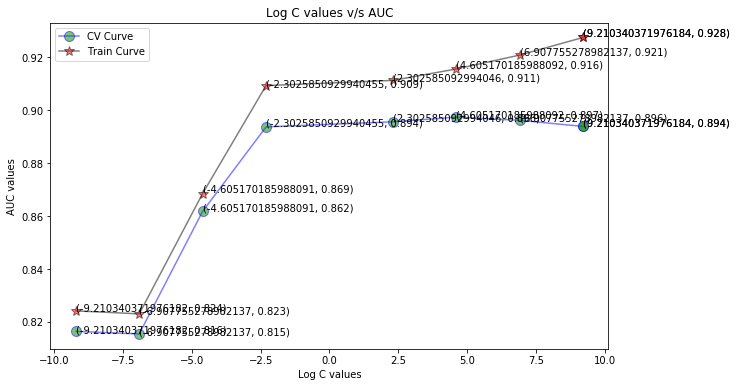

In [186]:
# Calling 'sv' function to find the optimal C

sv(x_tr_sv, x_cv_sv, y_tr_sv, y_cv_sv, c, 'rbf' )

# Observation:
    
AUC score for CV is 89% with C 100 and AUC score for train is 92% with C 10000

Let's consider C value obtained from CV score as it is more likely to predict the unseen data with AUC score close to it.

Optimal C: 100

In [187]:
o_c_b_sv = 100

# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on CV

Optimal C: 100


 Model performance on CV data with C value  100 



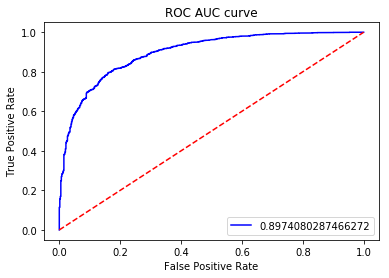

In [188]:
# Calling 'mod_per_sv' function to check model performance with ROC AUC score on train and CV
# Optimal C: 100

print("\n Model performance on CV data with C value ", o_c_b_sv, "\n")

mod_per_sv(x_tr_sv, x_cv_sv, y_tr_sv, y_cv_sv, o_c_b_sv, 'rbf' )

# Observation:

Probability of model to separate positive and negative review is 89%

# Calling 'test_metric_sv' to predict test data and get metrics

Optimal C: 100

Metric scores of test data
************************* 

ROC AUC score:  0.899 

************************* 

Precision score:  0.873 

************************* 

F1 score:  0.927 

************************* 

Recall score:  0.989 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.31      0.46       695
           1       0.87      0.99      0.93      3305

   micro avg       0.87      0.87      0.87      4000
   macro avg       0.87      0.65      0.69      4000
weighted avg       0.87      0.87      0.85      4000
 

************************* 

Confusion matrix table: 



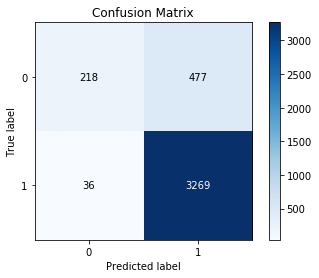

In [189]:
# Calling 'test_metric_sv' to predict test data and get metrics
# Optimal C: 100

rab_sv, pb_sv, fb_sv, reb_sv = test_metric_sv(x_tr_sv, x_test_sv_n, y_tr_sv, y_test_sv, o_c_b_sv, 'rbf')

# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on test data

Optimal C: 100


 Model performance on test data with C value  100 



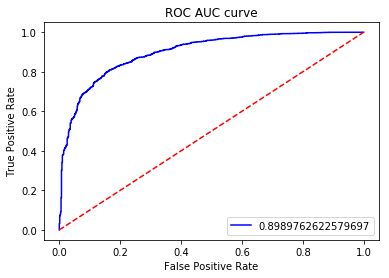

In [190]:
# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on test data
# Optimal C: 100

print("\n Model performance on test data with C value ", o_c_b_sv, "\n")

mod_per_sv(x_tr_sv, x_test_sv_n, y_tr_sv, y_test_sv, o_c_b_sv, 'rbf')

# Observation:

Probability of model to separate positive and negative review is 89%

# RBF Kernel on TF-IDF (Term Frequency Inverse Document Frequency)

In [191]:
# Import TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance
# Bi-gram
tf_sv = TfidfVectorizer(ngram_range = (1,2), min_df = 10, max_features = 500)

# Fit and transform train data
x_train_sv_tf = tf_sv.fit_transform(x_train_sv)

# Transform test data
x_test_sv_tf = tf_sv.transform(x_test_sv)

# Normalization

In [192]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
x_train_sv_tf_n = normalize(x_train_sv_tf)

# Normalize test data
x_test_sv_tf_n = normalize(x_test_sv_tf)

# Split into train and CV

In [193]:
# Split into train and CV

x_tr_sv_tf, x_cv_sv_tf, y_tr_sv_tf, y_cv_sv_tf = train_test_split(x_train_sv_tf_n, y_train_sv, random_state = 0, test_size = 0.2, shuffle = False)

# Calling 'sv' function to find optimal C

Maximum AUC score for CV:  0.8972934849687031
Corresponding C value of CV:  100 

Maximum AUC score for train:  0.9278895561841655
Corresponding C value of train:  10000 



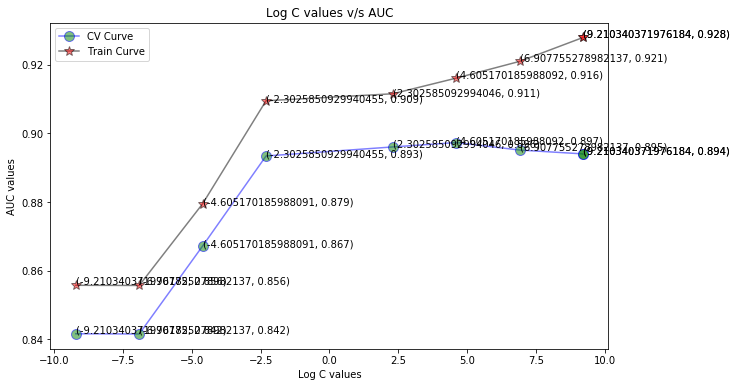

In [194]:
# Calling 'sv' function to find optimal C

sv(x_tr_sv_tf, x_cv_sv_tf, y_tr_sv_tf, y_cv_sv_tf, c, 'rbf')

# Observation:
    
AUC score for CV is 89% with C 100 and AUC score for train is 98% with C 10000

Optimal C: 10000

In [195]:
o_c_tf_sv = 10000

# Calling 'mod_per_sv' to check model performance with ROC AUC curve on CV

Optimal C: 10000


 Model performance on CV data with C value  10000 



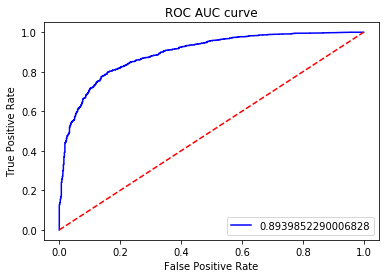

In [196]:
# Calling 'mod_per_sv' to check model performance with ROC AUC curve on CV
# Optimal C: 10000

print("\n Model performance on CV data with C value ", o_c_tf_sv, "\n")

mod_per_sv(x_tr_sv_tf, x_cv_sv_tf, y_tr_sv_tf, y_cv_sv_tf, o_c_tf_sv, 'rbf')

# Observation:
    
Probability of model to separate positive and negative review is 89%

# Calling 'test_metric_sv' function to predict test data and get metrics

Optimal C: 10000

Metric scores of test data
************************* 

ROC AUC score:  0.902 

************************* 

Precision score:  0.905 

************************* 

F1 score:  0.933 

************************* 

Recall score:  0.962 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       695
           1       0.90      0.96      0.93      3305

   micro avg       0.89      0.89      0.89      4000
   macro avg       0.82      0.74      0.77      4000
weighted avg       0.88      0.89      0.88      4000
 

************************* 

Confusion matrix table: 



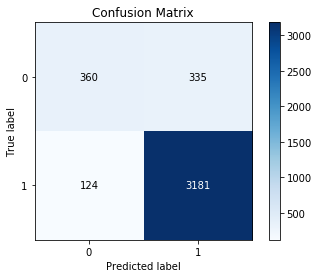

In [197]:
# Calling 'test_metric_sv' function to predict test data and get metrics
# Optimal C: 10000

ratf_sv, ptf_sv, ftf_sv, retf_sv = test_metric_sv(x_train_sv_tf_n, x_test_sv_tf_n, y_train_sv, y_test_sv, o_c_tf_sv, 'rbf')

# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on test data

Optimal C: 10000


 Model performance on test data with C value  10000 



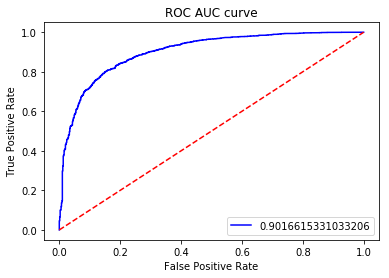

In [198]:
# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on test data
# Optimal C: 10000

print("\n Model performance on test data with C value ", o_c_tf_sv, "\n")

mod_per_sv(x_train_sv_tf_n, x_test_sv_tf_n, y_train_sv, y_test_sv, o_c_tf_sv, 'rbf')

# Observation:
    
Probability of model to separate positive and negative review is 90%

# Word2Vec

# Splitting into train, cv and test set

We will build Word2Vec model using 'train' data to avoid data leakage 

We will find hyperparameter with 'train' and 'cv'.

After hyperparameter has been found, we will use it to predict on 'test' data.

In [259]:
#Split into 2 train and test set.

x_train_w_sv, x_test_w_sv, y_train_w_sv, y_test_w_sv = train_test_split(x_20k, y_20k, test_size = 0.2,
                                                             random_state = 0, shuffle = False )


# Split train and cv
x_tr_w_sv, x_cv_w_sv, y_tr_w_sv, y_cv_w_sv = train_test_split(x_train_w_sv, y_train_w_sv, random_state = 0,
                                                          test_size = 0.25, shuffle = False)

# Defining a function to create Word2Vec

In [266]:
# Defining a function to create Word2Vec

def w_sv(x_t):
    
    list_t_sv = []
    
    for text in x_t:
        split = text.split()
        list_t_sv.append(split)
    return list_t_sv

# Defining a function for Avg Word2Vec

In [267]:
# Defining a function for Avg Word2Vec

def sent_sv(word_list):

    sentence_sv = [] # avg w2v of sentence/review will be stored in the empty list

    for sen in word_list:
        zero = np.zeros(50)  # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        count_div = 0         # Increases by 1 every iteration and divides the w2v the sum of w2v sentence/review
        for word in sen:
            if word in w2v_word_sv:
                vec = w2v_model_sv.wv[word]  # Gets the w2v for each word in a sentence/review
                zero += vec              # Sums the w2v of each word in a sentence/review at every iteration
                count_div += 1           # Increases by 1 at every iteration
        if count_div != 0:
            zero /= count_div            # w2v of sentence/review is divided by total number of words in a sentence/review (average w2v)
        sentence_sv.append(zero)            # Stores all the avg w2z in an empty list sentence
    
    return sentence_sv

# Calling function 'w_sv' to get list of words of x_train, x_test and x_cv

In [268]:
# Calling function 'w' to get list of words of x_train, x_test and x_cv

x_tr_list_sv = w_sv(x_tr_w_sv)
x_test_list_sv = w_sv(x_test_w_sv)
x_cv_list_sv = w_sv(x_cv_w_sv)

In [269]:
# Creating Word2Vec model using train data (x_train_list_sv)

# import gensim library
import gensim

#Create an instance for the genism model
w2v_model_sv = gensim.models.Word2Vec(x_tr_list_sv, min_count = 5, size = 50, workers = 4)
print(w2v_model_sv)

# Creating own corpus vocabulary
w2v_vocab_sv = w2v_model_sv[w2v_model_sv.wv.vocab]
print("Shape of w2v_vocab_sv:" + ' ' + str(w2v_vocab_sv.shape))

# Creating list of words
w2v_word_sv = list(w2v_model_sv.wv.vocab)
print("Length of w2v_word_sv:" + ' ' + str(len(w2v_word_sv)), '\n')
print('*'*50)
print("First 10 words from the list of words w2v_word_sv:")
w2v_word_sv[:10]

Word2Vec(vocab=5075, size=50, alpha=0.025)
Shape of w2v_vocab_sv: (5075, 50)
Length of w2v_word_sv: 5075 

**************************************************
First 10 words from the list of words w2v_word_sv:


['easi',
 'use',
 'make',
 'mess',
 'offer',
 'vibrant',
 'color',
 'would',
 'high',
 'recommend']

In [270]:
# Let's check the most similar words

w2v_model_sv.wv.most_similar('happi')

[('continu', 0.9143189191818237),
 ('glad', 0.9136728644371033),
 ('search', 0.9021660685539246),
 ('thank', 0.8983759880065918),
 ('offer', 0.8761196136474609),
 ('petsmart', 0.8739815950393677),
 ('thrill', 0.8700723052024841),
 ('wider', 0.8670591711997986),
 ('onlin', 0.8656867146492004),
 ('discontinu', 0.8652185201644897)]

# Observation:

As we can see, .most_similar gives the similar words to the input word along with the percentage of similarity

# Average Word2Vec- Calling 'sent_sv' function to get Avg Word2Vec

Convert Word2Vec to vectors.

Average Word2Vec is nothing but the average of vectors of each word of a given text/review/sentence.

In [207]:
# Calling 'sent_sv' function to get Avg Word2Vec

# Avg Word2Vec for train
x_tr_avg_w2v_sv = sent_sv(x_tr_list_sv)

# Avg Word2Vec for cv
x_cv_avg_w2v_sv = sent_sv(x_cv_list_sv)

# Avg Word2Vec for test
x_test_avg_w2v_sv = sent_sv(x_test_list_sv)

# Normalization

In [208]:
# Normalize train data
x_tr_avg_n_sv = normalize(x_tr_avg_w2v_sv)
print("Shape of normalized train Avg Word2Vec:" + ' ' + str(len(x_tr_avg_n_sv)))

# Normalize cv data
x_cv_avg_n_sv = normalize(x_cv_avg_w2v_sv)
print("Shape of normalized cv Avg Word2Vec:" + ' ' + str(len(x_cv_avg_n_sv)))

# Normalize test data
x_test_avg_n_sv = normalize(x_test_avg_w2v_sv)
print("Shape of normalized Avg Word2Vec:" + ' ' + str(len(x_test_avg_n_sv)))

Shape of normalized train Avg Word2Vec: 12000
Shape of normalized cv Avg Word2Vec: 4000
Shape of normalized Avg Word2Vec: 4000


# Calling 'sv' function to find optimal C

Maximum AUC score for CV:  0.8547714394299519
Corresponding C value of CV:  10000 

Maximum AUC score for train:  0.8718044060963115
Corresponding C value of train:  10000 



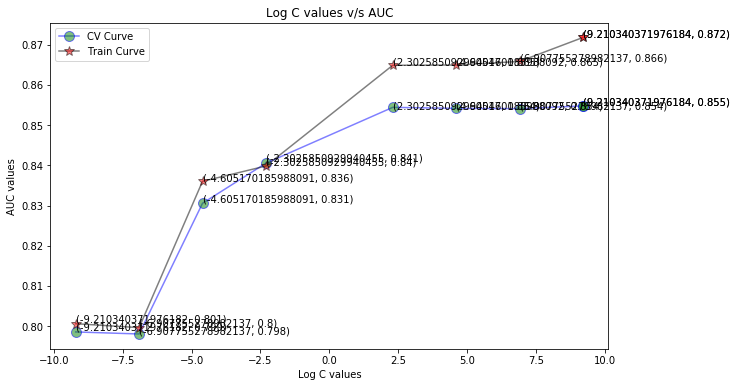

In [209]:
# Calling 'sv' function to find optimal C

sv(x_tr_avg_n_sv, x_cv_avg_n_sv, y_tr_w_sv, y_cv_w_sv, c, 'rbf')

# Observation:
    
AUC score for CV is 85% with C 10000 and AUC score for train is 87% with C 10000

Optimal C: 10000

In [210]:
o_c_avg_sv = 10000

# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on  CV

Optimal C: 10000


 Model performance on CV data with C value  10000 



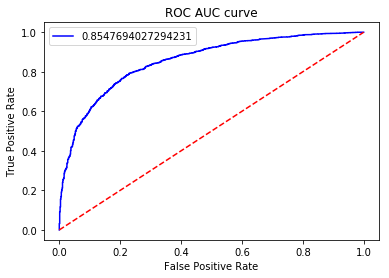

In [211]:
# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on train and CV
# Optimal C: 10000

print("\n Model performance on CV data with C value ", o_c_avg_sv, "\n")

mod_per_sv(x_tr_avg_n_sv, x_cv_avg_n_sv, y_tr_w_sv, y_cv_w_sv, o_c_avg_sv, 'rbf')

# Observation: 

Probability of model to separate positive and negative review is 85%

# Calling 'test_metric_sv' function to predict test set and get metrics

Optimal C: 10000

Metric scores of test data
************************* 

ROC AUC score:  0.85 

************************* 

Precision score:  0.856 

************************* 

F1 score:  0.916 

************************* 

Recall score:  0.986 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.76      0.21      0.33       695
           1       0.86      0.99      0.92      3305

   micro avg       0.85      0.85      0.85      4000
   macro avg       0.81      0.60      0.62      4000
weighted avg       0.84      0.85      0.81      4000
 

************************* 

Confusion matrix table: 



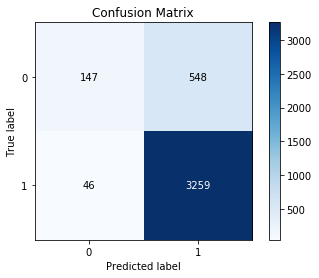

In [212]:
# Calling 'test_metric_sv' function to predict test set and get metrics
# Optimal C: 10000

ra_sv_avg, p_sv_avg, f_sv_avg, re_sv_avg = test_metric_sv(x_tr_avg_n_sv, x_test_avg_n_sv, y_tr_w_sv, y_test_w_sv, o_c_avg_sv, 'rbf')

# Calling 'mod_per_sv' to check model performance with ROC AUC curve on test set

Optimal C: 10000


 Model performance on test data with C value  10000 



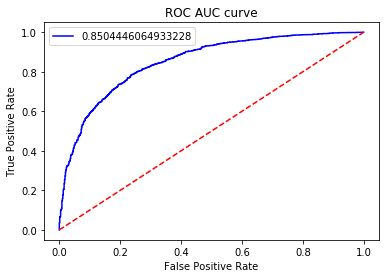

In [213]:
# Calling 'mod_per_sv' to check model performance with ROC AUC curve on test set
# Optimal C: 10000

print("\n Model performance on test data with C value ", o_c_avg_sv, "\n")

mod_per_sv(x_tr_avg_n_sv, x_test_avg_n_sv, y_tr_w_sv, y_test_w_sv, o_c_avg_sv, 'rbf')

# Observation:

Probability of model to separate positive and negative review is 85%

# TF-IDF Word2Vec

In [271]:
tf_model_sv = TfidfVectorizer()

tf_idf_tr_sv = tf_model_sv.fit_transform(x_tr_w_sv)
tf_idf_cv_sv = tf_model_sv.transform(x_cv_w_sv)
tf_idf_test_sv = tf_model_sv.transform(x_test_w_sv)

# we are converting a dictionary with word as a key, and the idf as a value

dicti_sv = dict(zip(tf_model_sv.get_feature_names(), list(tf_model_sv.idf_)))

# Defining a function to get TF-IDF Word2Vec

In [272]:
# Defining a function to get TF-IDF Word2Vec

def tf_w_sv(word_list):
    tf_sentence_sv = []   # Empty list to store the tfidf-w2v values
    for tf_sent in word_list:
        tf_zero = np.zeros(50)     # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
        tf_count = 0                # Increases by tfidf value of previous tfidf value for every iteration and divides the sum of tfidf-w2v of sentence/review
        for tf_word in tf_sent:
            if tf_word in w2v_word_sv:
                tf_vec = w2v_model_sv.wv[tf_word]  # Get tfidf_w2v for each word in a sentence/review       
                if tf_word in dicti_sv:
                    # tf_w2v = tf_idf_matrix[row, tf_feat.index(tf_word)]
                    tf_w2v = dicti_sv[tf_word] * (tf_sent.count(tf_word))/len(tf_sent) 
                    tf_zero += (tf_vec * tf_w2v)    # Increase by tfidf-w2v value for every iteration
                    tf_count += tf_w2v              # Increase by ifidf value for every iteration
        if tf_count != 0:
            tf_zero /= tf_count                     # tfidf-w2v of sentence/review is divided by total number of tfidf of words in a sentence/review (tfidf-w2v)
        tf_sentence_sv.append(tf_zero)                # Stores all the avg w2z in an empty list sentence
    
    return tf_sentence_sv

# Calling 'tf_w_sv' function to get TF-IDF Word2Vec

In [273]:
# Calling 'tf_w' function to get TF-IDF Word2Vec

# TFIDF Word2Vec for train
x_tr_tf_w2v_sv = tf_w_sv(x_tr_list_sv)

# TFIDF Word2Vec for cv
x_cv_tf_w2v_sv = tf_w_sv(x_cv_list_sv)

# TFIDF Word2Vec for test
x_test_tf_w2v_sv = tf_w_sv(x_test_list_sv)

# Normalization

In [274]:
# Normalize train data
x_tr_tf_n_sv = normalize(x_tr_tf_w2v_sv)
print("Shape of normalized train TFIDF Word2Vec:" + ' ' + str(len(x_tr_tf_n_sv)))

# Normalize cv data
x_cv_tf_n_sv = normalize(x_cv_tf_w2v_sv)
print("Shape of normalized cv TFIDF Word2Vec:" + ' ' + str(len(x_cv_tf_n_sv)))

# Normalize test data
x_test_tf_n_sv = normalize(x_test_tf_w2v_sv)
print("Shape of normalized TFIDF Word2Vec:" + ' ' + str(len(x_test_tf_n_sv)))

Shape of normalized train TFIDF Word2Vec: 12000
Shape of normalized cv TFIDF Word2Vec: 4000
Shape of normalized TFIDF Word2Vec: 4000


# Calling 'sv' function to find optimal C

Maximum AUC score for CV:  0.8374360628786481
Corresponding C value of CV:  10000 

Maximum AUC score for train:  0.8557510785551699
Corresponding C value of train:  10000 



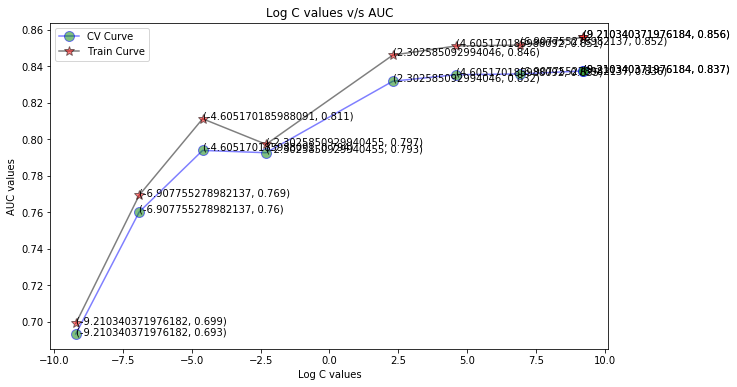

In [279]:
# Calling 'sv' function to find optimal C

sv(x_tr_tf_n_sv, x_cv_tf_n_sv, y_tr_w_sv, y_cv_w_sv, c , 'rbf')

# Observation:
    
AUC score of CV is 83% with C 100 and train is 85% with C 10000

Optimal C: 10000

In [280]:
o_c_tw_sv = 10000

# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on CV set

Optimal C: 10000


 Model performance on CV data with C value  10000 



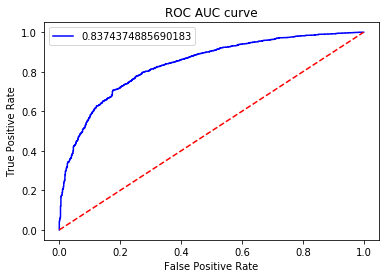

In [281]:
# Calling 'mod_per_sv' function to check model performance with ROC AUC curve on train and CV set
# Optimal C: 10000

print("\n Model performance on CV data with C value ", o_c_tw_sv, "\n")

mod_per_sv(x_tr_tf_n_sv, x_cv_tf_n_sv, y_tr_w_sv, y_cv_w_sv, o_c_tw_sv, 'rbf')

# Observation:
    
Probability of model to separate positive and negative review is 83%

# Calling 'test_metric_sv' function to predict test set and get metrics

Optimal C: 10000

Metric scores of test data
************************* 

ROC AUC score:  0.83 

************************* 

Precision score:  0.84 

************************* 

F1 score:  0.911 

************************* 

Recall score:  0.996 

************************* 

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.10      0.18       695
           1       0.84      1.00      0.91      3305

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.83      0.55      0.54      4000
weighted avg       0.84      0.84      0.78      4000
 

************************* 

Confusion matrix table: 



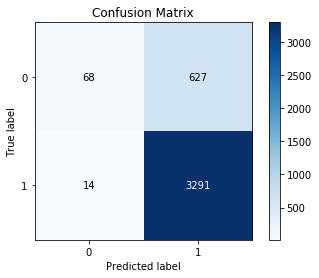

In [282]:
# Calling 'test_metric_sv' function to predict test set and get metrics
# Optimal C: 10000

ra_tw_sv, p_tw_sv, f_tw_sv, re_tw_sv = test_metric_sv(x_tr_tf_n_sv, x_test_tf_n_sv, y_tr_w_sv, y_test_w_sv, o_c_tw_sv, 'rbf')

# Calling 'mod_per_sv' to check model performance with ROC AUC curve on test set

Optimal C: 10000


 Model performance on test data with C value  10000 



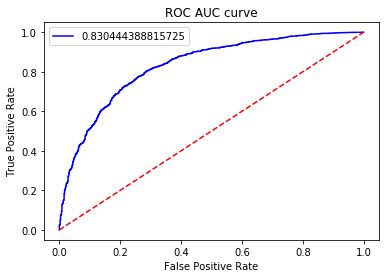

In [283]:
# Calling 'mod_per_sv' to check model performance with ROC AUC curve on test set
# Optimal C: 10000

print("\n Model performance on test data with C value ", o_c_tw_sv, "\n")

mod_per_sv(x_tr_tf_n_sv, x_test_tf_n_sv, y_tr_w_sv, y_test_w_sv, o_c_tw_sv, 'rbf')

# Observation:

Probability of model to separate positive and negative review is 83%

# Pretty Table

In [285]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Vectorizer', 'Norm', 'Alpha value', 'ROC AUC', 'Precision', 'F1-score', 'Recall']

a.add_row([1, 'Bag of Words', o_n_b, o_a_b, rab, pb, fb, reb])
a.add_row([2, 'TF-IDF', o_n_tf, o_a_tf, ratf, ptf, ftf, retf])
a.add_row([3, 'Avg Word2Vec', o_n_avg, o_a_avg, ra_avg, p_avg, f_avg, re_avg])
a.add_row([4, 'TF-IDF Word2Vec', o_n_tw, o_a_tw, ra_tw, p_tw, f_tw, re_tw])

print()
print(a.get_string(title = 'Table for Linear SVM'))
print('\n'*2)
from prettytable import PrettyTable

b = PrettyTable()

b.field_names = ['S.No', 'Vectorizer', 'C value', 'ROC AUC', 'Precision', 'F1-score', 'Recall']

b.add_row([1, 'Bag of Words', o_c_b_sv, rab_sv, pb_sv, fb_sv, reb_sv])
b.add_row([2, 'TF-IDF', o_c_tf_sv, ratf_sv, ptf_sv, ftf_sv, retf_sv])
b.add_row([3, 'Avg Word2Vec', o_c_avg_sv, ra_sv_avg, p_sv_avg, f_sv_avg, re_sv_avg])
b.add_row([4, 'TF-IDF Word2Vec', o_c_tw_sv, ra_tw_sv, p_tw_sv, f_tw_sv, re_tw_sv])

print(b.get_string(title = 'Table for RBF Kernel SVM'))


+---------------------------------------------------------------------------------------+
|                                  Table for Linear SVM                                 |
+------+-----------------+------+-------------+---------+-----------+----------+--------+
| S.No |    Vectorizer   | Norm | Alpha value | ROC AUC | Precision | F1-score | Recall |
+------+-----------------+------+-------------+---------+-----------+----------+--------+
|  1   |   Bag of Words  |  l2  |    0.0001   |  0.941  |   0.929   |  0.949   |  0.97  |
|  2   |      TF-IDF     |  l2  |    0.0001   |  0.942  |   0.925   |  0.948   | 0.973  |
|  3   |   Avg Word2Vec  |  l1  |    0.0001   |  0.895  |   0.894   |  0.928   | 0.964  |
|  4   | TF-IDF Word2Vec |  l1  |    0.0001   |  0.865  |   0.877   |   0.92   | 0.968  |
+------+-----------------+------+-------------+---------+-----------+----------+--------+



+----------------------------------------------------------------------------+
|                

# Conclusion

# From 'Linear SVM' table:
    
Highest AUC score we can see for both BoW and TF-IDF which is 94% and norm being 'l2' and alpha value being 0.0001.

# From 'RBF Kernel SVM' table:
    
Highest AUC score we can see for TF-IDF which is 90% and C value being 10000.

# Overall Conclusion:
    
We can consider TF-IDF as best suited for amazon fine food review dataset for SVM algorithm as it resulted highest AUC score among other vectorizer.